In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import numpy as np
from sklearn.metrics import accuracy_score
%matplotlib inline

%pwd

'/Users/tady/.ghq/github.com/tadyjp/kaggle/titanic'

In [17]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_answer = pd.read_csv('data/gender_submission.csv')
df_test = pd.merge(df_test, df_answer, how='inner')
output_file = 'data/output.csv'
df_train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [21]:
names = set()
for name in df_train['Name']:
    names.add(name.split(',')[1].split()[0].replace('.', ''))
for name in df_test['Name']:
    names.add(name.split(',')[1].split()[0].replace('.', ''))

print(names)

{'Dr', 'Jonkheer', 'Mrs', 'Mr', 'Ms', 'Master', 'Lady', 'Sir', 'Mlle', 'Miss', 'Capt', 'the', 'Col', 'Dona', 'Don', 'Mme', 'Major', 'Rev'}


In [22]:
def process(df):
    df = df.copy()

    # dummy Pclass
    dummy_sex = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
    df = pd.concat((df, dummy_sex), axis=1)

    # dummy Sex
    dummy_sex = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
    df = pd.concat((df, dummy_sex), axis=1)

    # dummy Embarked
    dummy_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = pd.concat((df, dummy_embarked), axis=1)

    # bin Age
    age_bins = list(range(0, 80 + 1, 5))
    age_bins_labels = [str(b) + "-" for b in age_bins[:-1]]
    age_bins_array = pd.cut(df['Age'], bins=age_bins, labels=age_bins_labels)
    df_age_bins = pd.DataFrame({'AgeBin': age_bins_array}, columns=('AgeBin',))
    dummy_age_bins = pd.get_dummies(df_age_bins['AgeBin'], prefix='AgeBin')
    df = pd.concat((df, dummy_age_bins), axis=1)

    df = pd.concat((df, df_age_bins), axis=1)

    # Families
    df['Families'] = df['SibSp'] + df['Parch']

    # Name
    name_classes = ['Dr', 'Major', 'Jonkheer', 'Lady', 'Col', 'Capt', 'Countess', 'Mr', 'Mlle', 'Master', 'Sir', 'Ms',
                    'Don', 'Rev', 'Mme', 'Mrs', 'Miss', 'Dona']
    for name_class in name_classes:
        df['Name_' + name_class] = df['Name'].str.contains(name_class)
        
    df['FareLog'] = np.log(df['Fare'] + 1)

    # drop
    df = df.drop('PassengerId', axis=1)
    df = df.drop('Pclass', axis=1)
    df = df.drop('Sex', axis=1)
    df = df.drop('AgeBin', axis=1)
    df = df.drop('Embarked', axis=1)
    df = df.drop('Name', axis=1)
    df = df.drop('Ticket', axis=1)
    df = df.drop('Cabin', axis=1)
    df = df.drop('Fare', axis=1)

    return df


df_train_processed = process(df_train)
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 46 columns):
Survived         891 non-null int64
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Pclass_2         891 non-null uint8
Pclass_3         891 non-null uint8
Sex_male         891 non-null uint8
Embarked_C       891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
AgeBin_0-        891 non-null uint8
AgeBin_5-        891 non-null uint8
AgeBin_10-       891 non-null uint8
AgeBin_15-       891 non-null uint8
AgeBin_20-       891 non-null uint8
AgeBin_25-       891 non-null uint8
AgeBin_30-       891 non-null uint8
AgeBin_35-       891 non-null uint8
AgeBin_40-       891 non-null uint8
AgeBin_45-       891 non-null uint8
AgeBin_50-       891 non-null uint8
AgeBin_55-       891 non-null uint8
AgeBin_60-       891 non-null uint8
AgeBin_65-       891 non-null uint8
AgeBin_70-       891 non-null

In [23]:
df_train_processed.corr()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Name_Master,Name_Sir,Name_Ms,Name_Don,Name_Rev,Name_Mme,Name_Mrs,Name_Miss,Name_Dona,FareLog
Survived,1.000000,-0.077221,-0.035322,0.081629,0.093349,-0.322308,-0.543351,0.168240,0.003650,-0.155660,...,0.085221,-0.006036,0.042470,-0.037436,-0.064988,0.042470,0.344223,0.327093,-0.026456,0.329862
Age,-0.077221,1.000000,-0.308247,-0.189119,0.006954,-0.312271,0.093254,0.036261,-0.022405,-0.032523,...,-0.398827,0.021179,-0.004384,0.055864,0.085407,-0.014703,0.176609,-0.276792,0.052374,0.116495
SibSp,-0.035322,-0.308247,1.000000,0.414838,-0.055932,0.092548,-0.114631,-0.059528,-0.026354,0.070941,...,0.349559,-0.010003,-0.015907,-0.000990,-0.026622,-0.015907,0.059419,0.087932,0.014507,0.318528
Parch,0.081629,-0.189119,0.414838,1.000000,-0.000734,0.015790,-0.245489,-0.011069,-0.081228,0.063036,...,0.267344,-0.027532,-0.015878,-0.022467,-0.021967,-0.015878,0.216862,0.105567,-0.015878,0.332186
Pclass_2,0.093349,0.006954,-0.055932,-0.000734,1.000000,-0.565210,-0.064746,-0.125416,-0.127301,0.192061,...,0.009903,-0.029652,0.065706,-0.024197,0.161400,-0.017100,0.128907,-0.024652,-0.017100,-0.039771
Pclass_3,-0.322308,-0.312271,0.092548,0.015790,-0.565210,1.000000,0.137143,-0.153329,0.237449,-0.009511,...,0.064918,0.013509,-0.037138,-0.052550,-0.091225,-0.037138,-0.186527,0.009548,-0.037138,-0.539071
Sex_male,-0.543351,0.093254,-0.114631,-0.245489,-0.064746,0.137143,1.000000,-0.082853,-0.074115,0.125722,...,0.159934,0.042878,-0.045439,0.034990,0.060741,-0.045439,-0.557751,-0.686808,0.024728,-0.263276
Embarked_C,0.168240,0.036261,-0.059528,-0.011069,-0.125416,-0.153329,-0.082853,1.000000,-0.148258,-0.778359,...,-0.035225,0.071046,-0.016158,0.098396,-0.039691,0.069538,0.070752,0.026215,0.069538,0.262341
Embarked_Q,0.003650,-0.022405,-0.026354,-0.081228,-0.127301,0.237449,-0.074115,-0.148258,1.000000,-0.496624,...,0.010478,-0.017877,-0.010310,-0.014588,0.023515,-0.010310,-0.092493,0.171117,-0.010310,-0.160456
Embarked_S,-0.155660,-0.032523,0.070941,0.063036,0.192061,-0.009511,0.125722,-0.778359,-0.496624,1.000000,...,0.025291,-0.050570,0.020759,-0.076588,0.020335,-0.054125,-0.008829,-0.134000,-0.054125,-0.135938


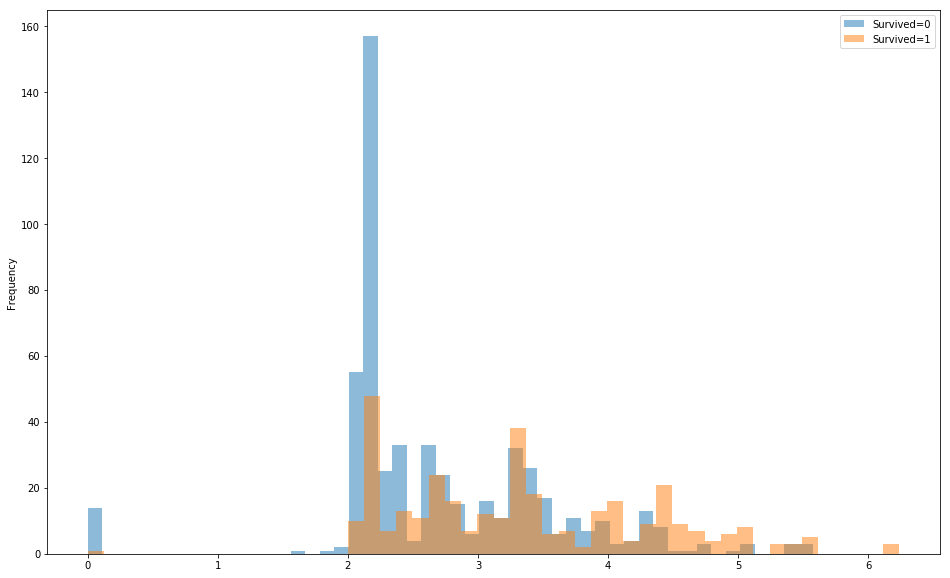

In [24]:
ax = df_train_processed[df_train_processed['Survived'] == 0].plot.hist(y='FareLog', label='Survived=0', bins=50, alpha=0.5, figsize=(16, 10))
ax = df_train_processed[df_train_processed['Survived'] == 1].plot.hist(y='FareLog', label='Survived=1', bins=50, alpha=0.5, ax=ax)


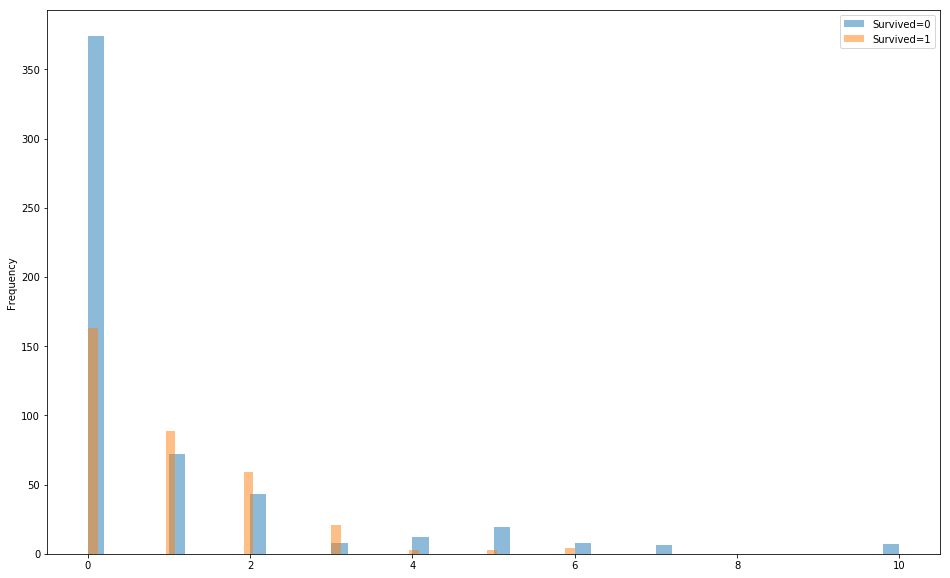

In [25]:
ax = df_train_processed[df_train_processed['Survived'] == 0].plot.hist(y='Families', label='Survived=0', bins=50, alpha=0.5, figsize=(16, 10))
ax = df_train_processed[df_train_processed['Survived'] == 1].plot.hist(y='Families', label='Survived=1', bins=50, alpha=0.5, ax=ax)

In [26]:
X_train, y_train = df_train_processed.drop('Survived', axis=1), df_train_processed['Survived']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

df_test_processed = process(df_test)
X_test, y_test = df_test_processed.drop('Survived', axis=1), df_test_processed['Survived']


[1]	valid_0's binary_error: 0.413408
[2]	valid_0's binary_error: 0.413408
[3]	valid_0's binary_error: 0.234637
[4]	valid_0's binary_error: 0.234637
[5]	valid_0's binary_error: 0.212291
[6]	valid_0's binary_error: 0.212291
[7]	valid_0's binary_error: 0.212291
[8]	valid_0's binary_error: 0.212291
[9]	valid_0's binary_error: 0.206704
[10]	valid_0's binary_error: 0.217877
[11]	valid_0's binary_error: 0.206704
[12]	valid_0's binary_error: 0.212291
[13]	valid_0's binary_error: 0.212291
[14]	valid_0's binary_error: 0.212291
[15]	valid_0's binary_error: 0.212291
[16]	valid_0's binary_error: 0.212291
[17]	valid_0's binary_error: 0.212291
[18]	valid_0's binary_error: 0.212291
[19]	valid_0's binary_error: 0.217877


[20]	valid_0's binary_error: 0.212291
[21]	valid_0's binary_error: 0.212291
[22]	valid_0's binary_error: 0.212291
[23]	valid_0's binary_error: 0.212291
[24]	valid_0's binary_error: 0.212291
[25]	valid_0's binary_error: 0.201117
[26]	valid_0's binary_error: 0.195531
[27]	valid_0's binary_error: 0.195531
[28]	valid_0's binary_error: 0.195531
[29]	valid_0's binary_error: 0.195531
[30]	valid_0's binary_error: 0.189944
[31]	valid_0's binary_error: 0.189944
[32]	valid_0's binary_error: 0.189944
[33]	valid_0's binary_error: 0.184358
[34]	valid_0's binary_error: 0.184358


[35]	valid_0's binary_error: 0.184358
[36]	valid_0's binary_error: 0.195531
[37]	valid_0's binary_error: 0.195531
[38]	valid_0's binary_error: 0.184358
[39]	valid_0's binary_error: 0.201117
[40]	valid_0's binary_error: 0.184358
[41]	valid_0's binary_error: 0.184358
[42]	valid_0's binary_error: 0.201117
[43]	valid_0's binary_error: 0.201117
[44]	valid_0's binary_error: 0.201117
[45]	valid_0's binary_error: 0.201117
[46]	valid_0's binary_error: 0.195531
[47]	valid_0's binary_error: 0.201117
[48]	valid_0's binary_error: 0.195531


[49]	valid_0's binary_error: 0.189944
[50]	valid_0's binary_error: 0.178771
[51]	valid_0's binary_error: 0.184358
[52]	valid_0's binary_error: 0.178771
[53]	valid_0's binary_error: 0.178771
[54]	valid_0's binary_error: 0.178771
[55]	valid_0's binary_error: 0.189944
[56]	valid_0's binary_error: 0.189944
[57]	valid_0's binary_error: 0.189944
[58]	valid_0's binary_error: 0.184358
[59]	valid_0's binary_error: 0.173184
[60]	valid_0's binary_error: 0.178771


[61]	valid_0's binary_error: 0.173184
[62]	valid_0's binary_error: 0.178771
[63]	valid_0's binary_error: 0.178771
[64]	valid_0's binary_error: 0.167598
[65]	valid_0's binary_error: 0.167598
[66]	valid_0's binary_error: 0.167598
[67]	valid_0's binary_error: 0.173184
[68]	valid_0's binary_error: 0.173184
[69]	valid_0's binary_error: 0.173184
[70]	valid_0's binary_error: 0.167598
[71]	valid_0's binary_error: 0.167598
[72]	valid_0's binary_error: 0.167598
[73]	valid_0's binary_error: 0.162011
[74]	valid_0's binary_error: 0.162011
[75]	valid_0's binary_error: 0.162011
[76]	valid_0's binary_error: 0.162011
[77]	valid_0's binary_error: 0.162011
[78]	valid_0's binary_error: 0.162011


[79]	valid_0's binary_error: 0.162011
[80]	valid_0's binary_error: 0.162011
[81]	valid_0's binary_error: 0.162011
[82]	valid_0's binary_error: 0.162011
[83]	valid_0's binary_error: 0.162011
[84]	valid_0's binary_error: 0.162011
[85]	valid_0's binary_error: 0.162011
[86]	valid_0's binary_error: 0.162011
[87]	valid_0's binary_error: 0.162011
[88]	valid_0's binary_error: 0.156425
[89]	valid_0's binary_error: 0.162011
[90]	valid_0's binary_error: 0.162011
[91]	valid_0's binary_error: 0.162011
[92]	valid_0's binary_error: 0.162011
[93]	valid_0's binary_error: 0.162011
[94]	valid_0's binary_error: 0.162011
[95]	valid_0's binary_error: 0.162011
[96]	valid_0's binary_error: 0.162011
[97]	valid_0's binary_error: 0.162011
[98]	valid_0's binary_error: 0.162011
[99]	valid_0's binary_error: 0.162011


[100]	valid_0's binary_error: 0.162011


0.861244019138756


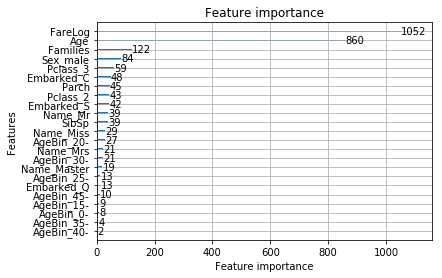

In [31]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_error',
}

model = lgb.train(lgb_params, lgb_train, valid_sets=lgb_val)
lgb.plot_importance(model)

y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

acc = accuracy_score(y_test, y_pred)
print(acc)


In [29]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred
})
submission.head()
# submission.to_csv(output_file, index=False)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
